In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Functions

In [2]:
def importa(archivo,nombres):
 data = pd.read_csv(archivo,sep=',',names=nombres,skiprows=0)#para archivo simple
 return data

In [3]:

def entrada(h,data,i):
      h[0][0]=data.I1[i] 
      h[0][1]=data.I2[i]
      return h[0]

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
def SE(y,h):
    return (y-h[1])**2

In [6]:
def dC(y,h,n):
    return (-2*(y[n]-h[1][n]))
    

In [7]:
def dh(z,n):
    return (sigmoid(z[n])*(1-sigmoid(z[n])))

In [8]:
def dz(h):
    return h[0]

In [9]:
def predict(h,w,b):
      z=w.dot(h[0])+b
      h[1]=sigmoid(z)
      return(h[1])

In [10]:
def train(h,epocs,criterio,etha,data):
    w=np.array((np.random.rand(2,2)))
    b=np.array((np.random.rand(2,1)))
    y=np.array([[data['OR']],[data['AND']]])
    output_layer_nodes=2
    c=SE(y,h)
    mse=[]
    costoOR=[]
    costoAND=[]
    costprom=np.mean(SE(y,h))
    #while (c[0]>criterio or c[1]>criterio):
    for epoc in range (epocs):
     mse.append(costprom/4)
     costprom=0
     for i in data.index:
       h[0]=entrada(h,data,i)
       y=np.array([[data['OR'].iloc[i]],[data['AND'].iloc[i]]])
       z=w.dot(h[0])+b
       h[1]=sigmoid(z)
       c=SE(y,h)
       costprom=costprom+np.mean(SE(y,h))
       costoOR.append(c[0])
       costoAND.append(c[1])
       for n in range(output_layer_nodes):
         Dw=etha*np.transpose(dz(h)*dh(z,n)*dC(y,h,n)) 
         w[n]=w[n]-Dw
         Db=etha*dh(z,n)*dC(y,h,n)
         b[n]=b[n]-Db
            
     if costprom<criterio:
        print('break in epoc:',epoc)
        break
    print('final weights:',w)
    print('final bias:',b)
    print('final MSE',costprom/4)
    return (w,b,costoOR,costoAND,mse)

# Execute

### Import data

In [11]:
data=importa('ANDOR.csv',['I1','I2','OR','AND'])
data

,I1,I2,OR,AND
0,1,1,1,1
1,0,1,1,0
2,1,0,1,0
3,0,0,0,0


### Define architecture and train NN 

In [12]:
h= np.array((np.random.rand(2,1),np.random.rand(2,1)))
epocs=5000
criterio=1e-5
etha=1
fit=train(h,epocs,criterio,etha,data)

final weights: [[8.67328987 8.67370164]
 [8.02737857 8.02672439]]
final bias: [[ -4.10315154]
 [-12.12765489]]
final MSE 0.00017256948878042585


In [13]:
w=fit[0]
b=fit[1]
costoOR=fit[2]
costoAND=fit[3]
costoprom=fit[4]

### Test

In [14]:
for case in data.index:
   h[0]=entrada(h,data,case)
   print('Input',h[0])
   print('output',predict(h,w,b))

Input [[1.]
 [1.]]
output [[0.99999823]
 [0.98066754]]
Input [[0.]
 [1.]]
output [[0.98975381]
 [0.01628758]]
Input [[1.]
 [0.]]
output [[0.98974963]
 [0.01629807]]
Input [[0.]
 [0.]]
output [[1.62520359e-02]
 [5.40784273e-06]]


### Graphing the cost function

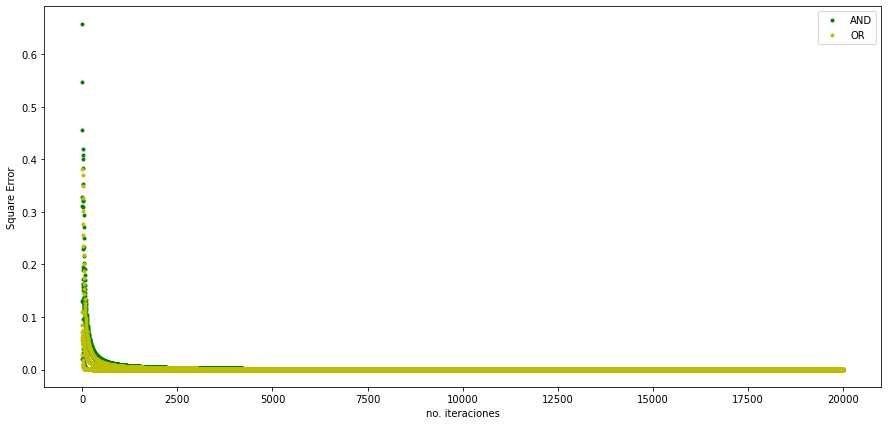

In [15]:
costoor=pd.DataFrame(costoOR)
#costo[0].plot()
#costo[1].plot()
costoand=pd.DataFrame(costoAND)
meanse=pd.DataFrame(costoprom)
fig, ax=plt.subplots(figsize=(15,7))
ax.plot(costoand,'g.',label='AND')
ax.plot(costoor,'y.',label='OR')
#ax.plot(meanse,'k-',label='RMSE')

ax.set_xlabel('no. iteraciones')
ax.set_ylabel('Square Error')
ax.legend(loc='upper right')

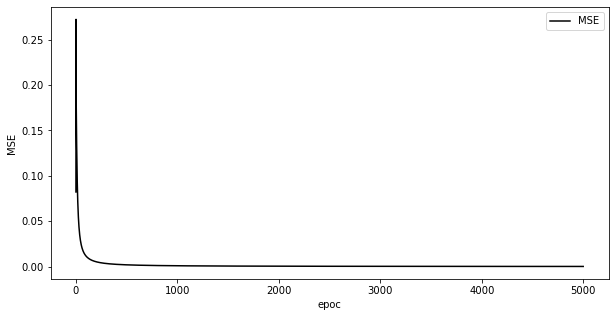

In [16]:
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(meanse,'k-',label='MSE')

ax.set_xlabel('epoc')
ax.set_ylabel('MSE')
ax.legend()


# TensorFlow

In [17]:
import tensorflow as tf #1st part
from tensorflow  import keras 
from tensorflow.keras import layers

In [18]:
x_train=np.array([[1,1],[1,0],[0,1],[0,0]])
y_train=np.array([[1,1],[1,0],[1,0],[0,0]])

In [19]:
model=keras.Sequential()
model.add(keras.Input(shape=2))
model.add(layers.Dense(2,activation='sigmoid'))
model.compile(loss="MSE",optimizer=keras.optimizers.SGD(lr=etha))
history=model.fit(x_train,y_train,epochs=epocs)
model.summary()
print(model.weights)

Train on 4 samples
Epoch 1/5000
4/4 [==============================] - 0s 90ms/sample - loss: 0.3216
Epoch 2/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.3047
Epoch 3/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.2892
Epoch 4/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2754
Epoch 5/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.2635
Epoch 6/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.2535
Epoch 7/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.2453
Epoch 8/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.2384
Epoch 9/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.2326
Epoch 10/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.2278
Epoch 11/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.2237
Epoch 12/5000
4/4 [==============================] - 0s 998us/sample

Epoch 99/5000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1032
Epoch 100/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.1024
Epoch 101/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.1016
Epoch 102/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.1008
Epoch 103/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.1000
Epoch 104/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0992
Epoch 105/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0985
Epoch 106/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0977
Epoch 107/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0970
Epoch 108/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0963
Epoch 109/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0956
Epoch 110/5000
4/4 [==============================] - 0s 749us/sample 

Epoch 196/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0573
Epoch 197/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0571
Epoch 198/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0568
Epoch 199/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0565
Epoch 200/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0563
Epoch 201/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0560
Epoch 202/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0557
Epoch 203/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0555
Epoch 204/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.0552
Epoch 205/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0550
Epoch 206/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0547
Epoch 207/5000
4/4 [==============================] - 0s 999us/sa

Epoch 293/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0386
Epoch 294/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0385
Epoch 295/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0384
Epoch 296/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0382
Epoch 297/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0381
Epoch 298/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0380
Epoch 299/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0378
Epoch 300/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0377
Epoch 301/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0376
Epoch 302/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0375
Epoch 303/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0373
Epoch 304/5000
4/4 [==============================] - 0s 749us/samp

Epoch 390/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0286
Epoch 391/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0285
Epoch 392/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0284
Epoch 393/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0283
Epoch 394/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0282
Epoch 395/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0282
Epoch 396/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0281
Epoch 397/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0280
Epoch 398/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0279
Epoch 399/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0279
Epoch 400/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0278
Epoch 401/5000
4/4 [==============================] - 0s 1000u

Epoch 487/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0223
Epoch 488/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0223
Epoch 489/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0222
Epoch 490/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0222
Epoch 491/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0221
Epoch 492/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0221
Epoch 493/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.0220
Epoch 494/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0220
Epoch 495/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0219
Epoch 496/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0219
Epoch 497/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0218
Epoch 498/5000
4/4 [==============================] - 0s 750us/

Epoch 584/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0182
Epoch 585/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0182
Epoch 586/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0181
Epoch 587/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0181
Epoch 588/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0181
Epoch 589/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0180
Epoch 590/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0180
Epoch 591/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0180
Epoch 592/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0179
Epoch 593/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0179
Epoch 594/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0179
Epoch 595/5000
4/4 [==============================] - 0s 750us/sampl

Epoch 681/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0153
Epoch 682/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0152
Epoch 683/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0152
Epoch 684/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0152
Epoch 685/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0152
Epoch 686/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0151
Epoch 687/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0151
Epoch 688/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0151
Epoch 689/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0151
Epoch 690/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.0150
Epoch 691/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0150
Epoch 692/5000
4/4 [==============================] - 0s 500us/

Epoch 778/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0131
Epoch 779/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0131
Epoch 780/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.0131
Epoch 781/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0130
Epoch 782/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0130
Epoch 783/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0130
Epoch 784/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0130
Epoch 785/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0130
Epoch 786/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0129
Epoch 787/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0129
Epoch 788/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0129
Epoch 789/5000
4/4 [==============================] - 0s 749us/s

Epoch 875/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0114
Epoch 876/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0114
Epoch 877/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0114
Epoch 878/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0114
Epoch 879/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0114
Epoch 880/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0114
Epoch 881/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0113
Epoch 882/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0113
Epoch 883/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0113
Epoch 884/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0113
Epoch 885/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0113
Epoch 886/5000
4/4 [==============================] - 0s 750us/

Epoch 972/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0101
Epoch 973/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0101
Epoch 974/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0101
Epoch 975/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0101
Epoch 976/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0101
Epoch 977/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0101
Epoch 978/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0100
Epoch 979/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0100
Epoch 980/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0100
Epoch 981/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0100
Epoch 982/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0100
Epoch 983/5000
4/4 [==============================] - 0s 500us/

Epoch 1068/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0091
Epoch 1069/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0091
Epoch 1070/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0091
Epoch 1071/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0090
Epoch 1072/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0090
Epoch 1073/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0090
Epoch 1074/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0090
Epoch 1075/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0090
Epoch 1076/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0090
Epoch 1077/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0090
Epoch 1078/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0090
Epoch 1079/5000
4/4 [==============================] 

Epoch 1164/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0082
Epoch 1165/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0082
Epoch 1166/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0082
Epoch 1167/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0082
Epoch 1168/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0082
Epoch 1169/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0082
Epoch 1170/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0082
Epoch 1171/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0082
Epoch 1172/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0081
Epoch 1173/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0081
Epoch 1174/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0081
Epoch 1175/5000
4/4 [==============================] - 0s

Epoch 1260/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0075
Epoch 1261/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0075
Epoch 1262/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0075
Epoch 1263/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0075
Epoch 1264/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0075
Epoch 1265/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0075
Epoch 1266/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0074
Epoch 1267/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0074
Epoch 1268/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0074
Epoch 1269/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0074
Epoch 1270/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0074
Epoch 1271/5000
4/4 [==============================

Epoch 1356/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0069
Epoch 1357/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0069
Epoch 1358/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0069
Epoch 1359/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0069
Epoch 1360/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0069
Epoch 1361/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0069
Epoch 1362/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0068
Epoch 1363/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0068
Epoch 1364/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0068
Epoch 1365/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0068
Epoch 1366/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0068
Epoch 1367/5000
4/4 [==============================] - 0

Epoch 1452/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0064
Epoch 1453/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0064
Epoch 1454/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0063
Epoch 1455/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0063
Epoch 1456/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0063
Epoch 1457/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0063
Epoch 1458/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0063
Epoch 1459/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0063
Epoch 1460/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0063
Epoch 1461/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0063
Epoch 1462/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0063
Epoch 1463/5000
4/4 [==============================] - 0s

Epoch 1548/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0059
Epoch 1549/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0059
Epoch 1550/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0059
Epoch 1551/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0059
Epoch 1552/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0059
Epoch 1553/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0059
Epoch 1554/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0059
Epoch 1555/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0059
Epoch 1556/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0059
Epoch 1557/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0059
Epoch 1558/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0059
Epoch 1559/5000
4/4 [==============================]

Epoch 1644/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0055
Epoch 1645/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0055
Epoch 1646/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0055
Epoch 1647/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0055
Epoch 1648/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0055
Epoch 1649/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0055
Epoch 1650/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0055
Epoch 1651/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0055
Epoch 1652/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0055
Epoch 1653/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0055
Epoch 1654/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0055
Epoch 1655/5000
4/4 [==============================] -

Epoch 1740/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0052
Epoch 1741/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0052
Epoch 1742/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0052
Epoch 1743/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0052
Epoch 1744/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0051
Epoch 1745/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0051
Epoch 1746/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0051
Epoch 1747/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0051
Epoch 1748/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0051
Epoch 1749/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0051
Epoch 1750/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0051
Epoch 1751/5000
4/4 [==============================] 

Epoch 1836/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0049
Epoch 1837/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0049
Epoch 1838/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0048
Epoch 1839/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0048
Epoch 1840/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0048
Epoch 1841/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0048
Epoch 1842/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0048
Epoch 1843/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0048
Epoch 1844/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0048
Epoch 1845/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0048
Epoch 1846/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0048
Epoch 1847/5000
4/4 [==============================] 

Epoch 1932/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0046
Epoch 1933/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0046
Epoch 1934/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0046
Epoch 1935/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0046
Epoch 1936/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0046
Epoch 1937/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0046
Epoch 1938/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0046
Epoch 1939/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0046
Epoch 1940/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0046
Epoch 1941/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0046
Epoch 1942/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0046
Epoch 1943/5000
4/4 [==============================] -

Epoch 2028/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0043
Epoch 2029/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0043
Epoch 2030/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0043
Epoch 2031/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0043
Epoch 2032/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0043
Epoch 2033/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0043
Epoch 2034/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0043
Epoch 2035/5000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0043
Epoch 2036/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0043
Epoch 2037/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0043
Epoch 2038/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0043
Epoch 2039/5000
4/4 [==============================]

Epoch 2124/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0041
Epoch 2125/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0041
Epoch 2126/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0041
Epoch 2127/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0041
Epoch 2128/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0041
Epoch 2129/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0041
Epoch 2130/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0041
Epoch 2131/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0041
Epoch 2132/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0041
Epoch 2133/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0041
Epoch 2134/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0041
Epoch 2135/5000
4/4 [==============================] -

Epoch 2220/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0039
Epoch 2221/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0039
Epoch 2222/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0039
Epoch 2223/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0039
Epoch 2224/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0039
Epoch 2225/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0039
Epoch 2226/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0039
Epoch 2227/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 2228/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0039
Epoch 2229/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0039
Epoch 2230/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0039
Epoch 2231/5000
4/4 [==============================] - 0

Epoch 2316/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0037
Epoch 2317/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0037
Epoch 2318/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 2319/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0037
Epoch 2320/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0037
Epoch 2321/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0037
Epoch 2322/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0037
Epoch 2323/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0037
Epoch 2324/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0037
Epoch 2325/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0037
Epoch 2326/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0037
Epoch 2327/5000
4/4 [==============================] -

Epoch 2412/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0036
Epoch 2413/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0036
Epoch 2414/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0036
Epoch 2415/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0036
Epoch 2416/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0036
Epoch 2417/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0035
Epoch 2418/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0035
Epoch 2419/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0035
Epoch 2420/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0035
Epoch 2421/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0035
Epoch 2422/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0035
Epoch 2423/5000
4/4 [==============================] - 

Epoch 2508/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0034
Epoch 2509/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 2510/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0034
Epoch 2511/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0034
Epoch 2512/5000
4/4 [==============================] - 0s 752us/sample - loss: 0.0034
Epoch 2513/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0034
Epoch 2514/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0034
Epoch 2515/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0034
Epoch 2516/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0034
Epoch 2517/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0034
Epoch 2518/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0034
Epoch 2519/5000
4/4 [==============================] - 0

Epoch 2604/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0033
Epoch 2605/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0033
Epoch 2606/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0033
Epoch 2607/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0033
Epoch 2608/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0033
Epoch 2609/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0033
Epoch 2610/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0033
Epoch 2611/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.0033
Epoch 2612/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0033
Epoch 2613/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 2614/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0032
Epoch 2615/5000
4/4 [==============================] - 

Epoch 2700/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0031
Epoch 2701/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0031
Epoch 2702/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0031
Epoch 2703/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0031
Epoch 2704/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0031
Epoch 2705/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0031
Epoch 2706/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0031
Epoch 2707/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0031
Epoch 2708/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0031
Epoch 2709/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0031
Epoch 2710/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0031
Epoch 2711/5000
4/4 [==============================] 

Epoch 2796/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0030
Epoch 2797/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 2798/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0030
Epoch 2799/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0030
Epoch 2800/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0030
Epoch 2801/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0030
Epoch 2802/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0030
Epoch 2803/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0030
Epoch 2804/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0030
Epoch 2805/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0030
Epoch 2806/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0030
Epoch 2807/5000
4/4 [==============================] - 0

Epoch 2892/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0029
Epoch 2893/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0029
Epoch 2894/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0029
Epoch 2895/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0029
Epoch 2896/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0029
Epoch 2897/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0029
Epoch 2898/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0029
Epoch 2899/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0029
Epoch 2900/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0029
Epoch 2901/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0029
Epoch 2902/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0029
Epoch 2903/5000
4/4 [==============================] 

Epoch 2988/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0028
Epoch 2989/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0028
Epoch 2990/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0028
Epoch 2991/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0028
Epoch 2992/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0028
Epoch 2993/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0028
Epoch 2994/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0028
Epoch 2995/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0028
Epoch 2996/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0028
Epoch 2997/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0028
Epoch 2998/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0028
Epoch 2999/5000
4/4 [==============================] - 

Epoch 3084/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0027
Epoch 3085/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0027
Epoch 3086/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0027
Epoch 3087/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0027
Epoch 3088/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0027
Epoch 3089/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0027
Epoch 3090/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0027
Epoch 3091/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0027
Epoch 3092/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0027
Epoch 3093/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0027
Epoch 3094/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0027
Epoch 3095/5000
4/4 [==============================] -

Epoch 3180/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0026
Epoch 3181/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0026
Epoch 3182/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0026
Epoch 3183/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0026
Epoch 3184/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0026
Epoch 3185/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0026
Epoch 3186/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0026
Epoch 3187/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0026
Epoch 3188/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0026
Epoch 3189/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0026
Epoch 3190/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0026
Epoch 3191/5000
4/4 [==============================] 

Epoch 3276/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0025
Epoch 3277/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0025
Epoch 3278/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0025
Epoch 3279/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0025
Epoch 3280/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0025
Epoch 3281/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0025
Epoch 3282/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0025
Epoch 3283/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0025
Epoch 3284/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0025
Epoch 3285/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0025
Epoch 3286/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0025
Epoch 3287/5000
4/4 [==============================] 

Epoch 3372/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0024
Epoch 3373/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0024
Epoch 3374/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0024
Epoch 3375/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0024
Epoch 3376/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0024
Epoch 3377/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024
Epoch 3378/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0024
Epoch 3379/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024
Epoch 3380/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0024
Epoch 3381/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024
Epoch 3382/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0024
Epoch 3383/5000
4/4 [==============================] 

Epoch 3468/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0024
Epoch 3469/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0024
Epoch 3470/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0024
Epoch 3471/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0024
Epoch 3472/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0024
Epoch 3473/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0024
Epoch 3474/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0024
Epoch 3475/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0024
Epoch 3476/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0024
Epoch 3477/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0024
Epoch 3478/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0024
Epoch 3479/5000
4/4 [==============================] 

Epoch 3564/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0023
Epoch 3565/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0023
Epoch 3566/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0023
Epoch 3567/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0023
Epoch 3568/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0023
Epoch 3569/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0023
Epoch 3570/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0023
Epoch 3571/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0023
Epoch 3572/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0023
Epoch 3573/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0023
Epoch 3574/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0023
Epoch 3575/5000
4/4 [==============================]

Epoch 3660/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0022
Epoch 3661/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0022
Epoch 3662/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0022
Epoch 3663/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0022
Epoch 3664/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0022
Epoch 3665/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0022
Epoch 3666/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0022
Epoch 3667/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0022
Epoch 3668/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0022
Epoch 3669/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0022
Epoch 3670/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0022
Epoch 3671/5000
4/4 [==============================] - 0s

Epoch 3756/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0022
Epoch 3757/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0022
Epoch 3758/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0022
Epoch 3759/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0022
Epoch 3760/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0022
Epoch 3761/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0022
Epoch 3762/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0022
Epoch 3763/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0022
Epoch 3764/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0022
Epoch 3765/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0022
Epoch 3766/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0022
Epoch 3767/5000
4/4 [==============================] 

Epoch 3852/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0021
Epoch 3853/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.0021
Epoch 3854/5000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0021
Epoch 3855/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0021
Epoch 3856/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0021
Epoch 3857/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0021
Epoch 3858/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0021
Epoch 3859/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0021
Epoch 3860/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0021
Epoch 3861/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0021
Epoch 3862/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0021
Epoch 3863/5000
4/4 [==============================] - 0

Epoch 3948/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 3949/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 3950/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 3951/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0020
Epoch 3952/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 3953/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 3954/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0020
Epoch 3955/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0020
Epoch 3956/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 3957/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 3958/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 3959/5000
4/4 [==============================] -

Epoch 4044/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 4045/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 4046/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0020
Epoch 4047/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 4048/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 4049/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0020
Epoch 4050/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0020
Epoch 4051/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0020
Epoch 4052/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0020
Epoch 4053/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 4054/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0020
Epoch 4055/5000
4/4 [==============================] - 0s 

Epoch 4140/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0019
Epoch 4141/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0019
Epoch 4142/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0019
Epoch 4143/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0019
Epoch 4144/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0019
Epoch 4145/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0019
Epoch 4146/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0019
Epoch 4147/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0019
Epoch 4148/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0019
Epoch 4149/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0019
Epoch 4150/5000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0019
Epoch 4151/5000
4/4 [==============================] -

Epoch 4236/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0019
Epoch 4237/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0019
Epoch 4238/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0019
Epoch 4239/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0019
Epoch 4240/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0019
Epoch 4241/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0019
Epoch 4242/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0019
Epoch 4243/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0019
Epoch 4244/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0019
Epoch 4245/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0019
Epoch 4246/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0019
Epoch 4247/5000
4/4 [==============================] -

Epoch 4332/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0018
Epoch 4333/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4334/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0018
Epoch 4335/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0018
Epoch 4336/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4337/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0018
Epoch 4338/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0018
Epoch 4339/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0018
Epoch 4340/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0018
Epoch 4341/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0018
Epoch 4342/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4343/5000
4/4 [==============================] - 0s

Epoch 4428/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4429/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.0018
Epoch 4430/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0018
Epoch 4431/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0018
Epoch 4432/5000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0018
Epoch 4433/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0018
Epoch 4434/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4435/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4436/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4437/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4438/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4439/5000
4/4 [==============================] - 0

Epoch 4524/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4525/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4526/5000
4/4 [==============================] - 0s 751us/sample - loss: 0.0018
Epoch 4527/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4528/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0018
Epoch 4529/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0018
Epoch 4530/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0018
Epoch 4531/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0018
Epoch 4532/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0018
Epoch 4533/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.0018
Epoch 4534/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0018
Epoch 4535/5000
4/4 [==============================] - 0

Epoch 4620/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0017
Epoch 4621/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0017
Epoch 4622/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0017
Epoch 4623/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0017
Epoch 4624/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0017
Epoch 4625/5000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0017
Epoch 4626/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.0017
Epoch 4627/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0017
Epoch 4628/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0017
Epoch 4629/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0017
Epoch 4630/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0017
Epoch 4631/5000
4/4 [==============================] - 

Epoch 4716/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0017
Epoch 4717/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0017
Epoch 4718/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0017
Epoch 4719/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0017
Epoch 4720/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0017
Epoch 4721/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0017
Epoch 4722/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0017
Epoch 4723/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0017
Epoch 4724/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0017
Epoch 4725/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0017
Epoch 4726/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0017
Epoch 4727/5000
4/4 [==============================] - 

Epoch 4812/5000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0016
Epoch 4813/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0016
Epoch 4814/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0016
Epoch 4815/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 4816/5000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0016
Epoch 4817/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0016
Epoch 4818/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0016
Epoch 4819/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 4820/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0016
Epoch 4821/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0016
Epoch 4822/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0016
Epoch 4823/5000
4/4 [==============================] - 

Epoch 4908/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 4909/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 4910/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0016
Epoch 4911/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0016
Epoch 4912/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0016
Epoch 4913/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.0016
Epoch 4914/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0016
Epoch 4915/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 4916/5000
4/4 [==============================] - 0s 999us/sample - loss: 0.0016
Epoch 4917/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 4918/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.0016
Epoch 4919/5000
4/4 [==============================] -

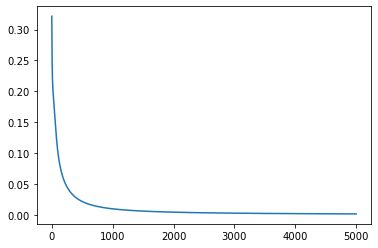

In [20]:
plt.plot(history.history['loss'])

In [21]:
model.predict(x_train)

array([[9.9994910e-01, 9.4109720e-01],
       [9.6946990e-01, 4.9524564e-02],
       [9.6947128e-01, 4.9524564e-02],
       [4.8808113e-02, 1.6989751e-04]], dtype=float32)

In [22]:
print('TF weights',model.weights[0])
print('TF bias',model.weights[1])
print('weighs',w)
print('bias',b)


TF weights <tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[6.4278555, 5.7256517],
       [6.427902 , 5.7256517]], dtype=float32)>
TF bias <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-2.9698193, -8.680145 ], dtype=float32)>
weighs [[8.67328987 8.67370164]
 [8.02737857 8.02672439]]
bias [[ -4.10315154]
 [-12.12765489]]
